In [12]:
# Data Manipulation Libraries
import pandas as pd 

# Data Visualization Libraries  
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 

# Machine Learning Libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Others  
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

## Data Collection

In [14]:
df = pd.read_csv(r"H:\Programming\Dataset\Machine Learning\Placement_Data_Full_Class.csv")
df.head(3)

,Sno,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,Mkt&Fin,57.80,Placed,250000.0


## Data Understanding

In [16]:
print("Info: ")
print(df.info())
print("\nNaN values: ")
print(df.isnull().sum())
print("\nDuplicates: ")
print(df.duplicated().sum())

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sno             215 non-null    int64  
 1   Gender          215 non-null    object 
 2   10th %          215 non-null    float64
 3   SSC Board       215 non-null    object 
 4   12th %          215 non-null    float64
 5   HSC Board       215 non-null    object 
 6   12th Stream     215 non-null    object 
 7   Degree %        215 non-null    float64
 8   Degree stream   215 non-null    object 
 9   Work exp        215 non-null    object 
 10  specialisation  215 non-null    object 
 11  Mba %           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB
None

NaN values: 
Sno                0
Gender             0
10th %             0
SSC Board          0
12

## Data Cleaning

In [18]:
df.drop(columns="Sno", inplace=True)

In [19]:
df['salary'].fillna(df['salary'].mode()[0], inplace=True)
df.isnull().sum()

Gender            0
10th %            0
SSC Board         0
12th %            0
HSC Board         0
12th Stream       0
Degree %          0
Degree stream     0
Work exp          0
specialisation    0
Mba %             0
status            0
salary            0
dtype: int64

## Exploratory Data Analysis (EDA)

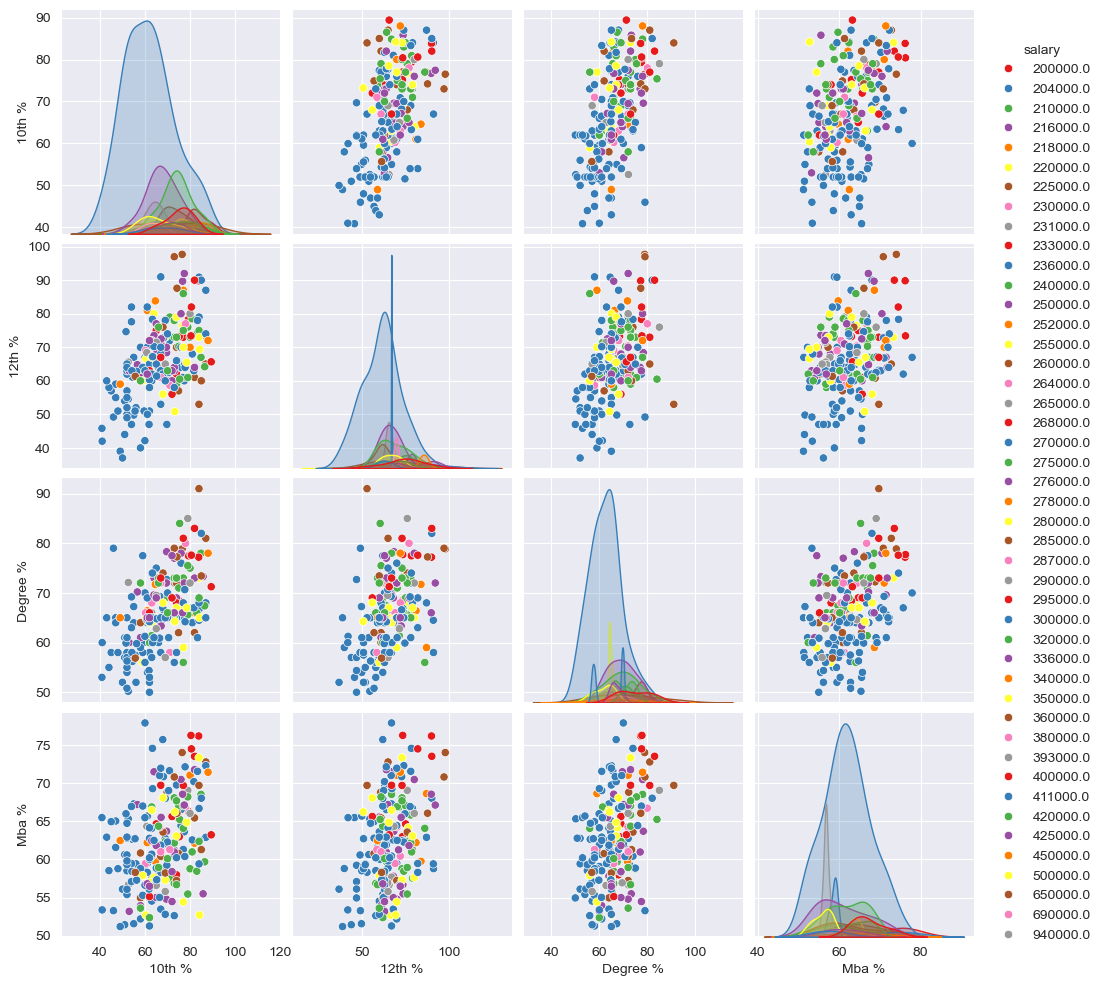

In [21]:
sns.pairplot(df, hue='salary', palette='Set1')
plt.show()


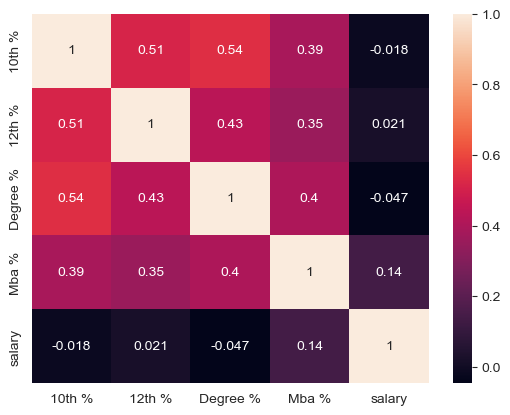

In [22]:
sns.heatmap(df.select_dtypes(include=["int", "float"]).corr(), annot=True)
plt.show()


In [23]:
x = df.iloc[:,:-1]
y = df['salary']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [25]:
from sklearn.preprocessing import LabelEncoder

le_dict = {}          # store encoders
       # keep original data safe

# select only object/string columns from df2
obj_cols = df.select_dtypes(include='object').columns

for col in obj_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    le_dict[col] = le   # save encoder for future use

df.head()


,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,1,59.43,0,300000.0
4,1,85.80,0,73.60,0,1,73.30,0,0,0,55.50,1,425000.0


# Best Model Selection


🏆 Best Model (Lowest RMSE): Ridge Regression
R2 Score               0.104253
MAE                41912.294563
RMSE               72634.343166
Accuracy (±10%)        0.558140
Name: Ridge Regression, dtype: float64


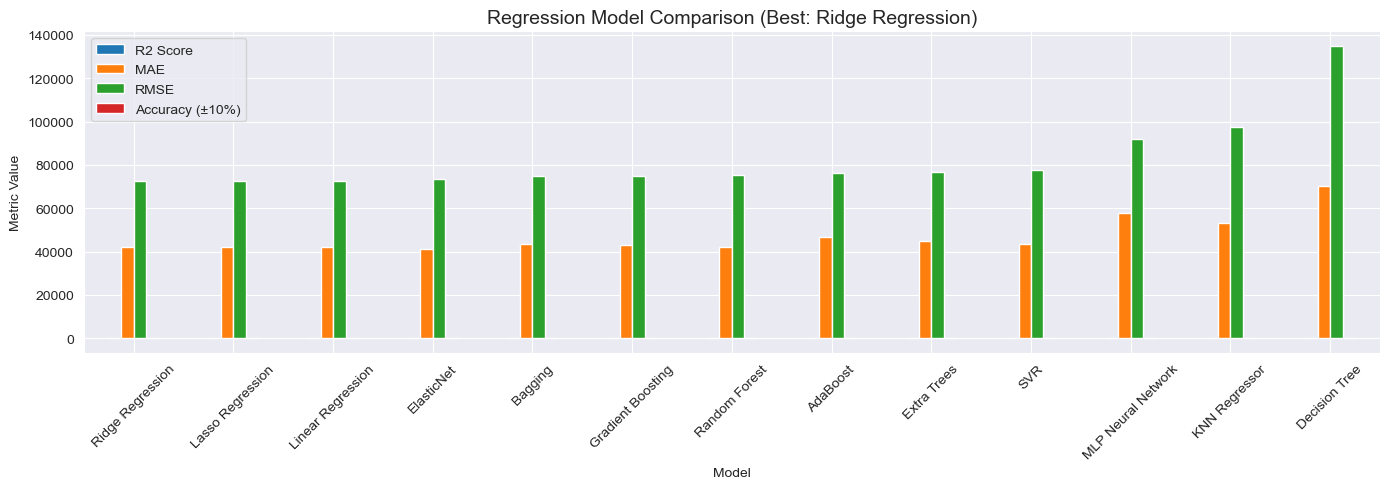


📊 Model Performance Summary (Lower RMSE = Better)


,R2 Score,MAE,RMSE,Accuracy (±10%)
Ridge Regression,0.1043,41912.2946,72634.3432,0.5581
Lasso Regression,0.1040,41963.5660,72644.4826,0.5581
Linear Regression,0.1040,41964.5657,72644.5516,0.5581
ElasticNet,0.0883,41097.1209,73279.8388,0.5814
Bagging,0.0513,43576.7442,74750.6833,0.4651
Gradient Boosting,0.0511,42964.7203,74758.1165,0.4884
Random Forest,0.0423,42262.0930,75105.0754,0.5581
AdaBoost,0.0113,46492.7565,76311.7416,0.4419
Extra Trees,0.0008,44883.9535,76713.1014,0.4419
SVR,-0.0228,43695.4854,77615.7489,0.5116



❌ Error Analysis (Higher RMSE = Worse)


,R2 Score,MAE,RMSE,Accuracy (±10%)
Decision Tree,-2.0896,70232.5581,134896.3426,0.4186
KNN Regressor,-0.6185,53313.5434,97634.0699,0.6279
MLP Neural Network,-0.4423,57764.8533,92166.5706,0.3721
SVR,-0.0228,43695.4854,77615.7489,0.5116
Extra Trees,0.0008,44883.9535,76713.1014,0.4419
AdaBoost,0.0113,46492.7565,76311.7416,0.4419
Random Forest,0.0423,42262.0930,75105.0754,0.5581
Gradient Boosting,0.0511,42964.7203,74758.1165,0.4884
Bagging,0.0513,43576.7442,74750.6833,0.4651
ElasticNet,0.0883,41097.1209,73279.8388,0.5814


In [65]:
# ======================================================
# 1. IMPORT LIBRARIES
# ======================================================
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

sns.set_style("darkgrid")
RANDOM_STATE = 42


# ======================================================
# 2. FEATURES & TARGET
# ======================================================
X = df.drop(columns="salary")
y = df["salary"]


# ======================================================
# 3. TRAIN–TEST SPLIT
# ======================================================
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=RANDOM_STATE
)


# ======================================================
# 4. SCALING (ONLY FOR SCALE-SENSITIVE MODELS)
# ======================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ======================================================
# 5. REGRESSION ACCURACY (BUSINESS-DEFINED)
# ======================================================
def regression_accuracy(y_true, y_pred, tolerance=0.10):
    """
    Accuracy = % of predictions within ±tolerance of true value
    """
    return np.mean(np.abs(y_pred - y_true) <= tolerance * y_true)


# ======================================================
# 6. MODEL DEFINITIONS
#    (model, need_scaling)
# ======================================================
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor,
    AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

models = {
    "Linear Regression": (LinearRegression(), True),
    "Ridge Regression": (Ridge(), True),
    "Lasso Regression": (Lasso(), True),
    "ElasticNet": (ElasticNet(), True),

    "Decision Tree": (DecisionTreeRegressor(random_state=RANDOM_STATE), False),
    "Random Forest": (RandomForestRegressor(random_state=RANDOM_STATE), False),
    "Extra Trees": (ExtraTreesRegressor(random_state=RANDOM_STATE), False),
    "Gradient Boosting": (GradientBoostingRegressor(random_state=RANDOM_STATE), False),
    "AdaBoost": (AdaBoostRegressor(random_state=RANDOM_STATE), False),
    "Bagging": (BaggingRegressor(random_state=RANDOM_STATE), False),

    "KNN Regressor": (KNeighborsRegressor(weights="distance"), True),
    "SVR": (SVR(), True),
    "MLP Neural Network": (
        MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=3000, random_state=RANDOM_STATE),
        True
    )
}


# ======================================================
# 7. TRAINING, EVALUATION & STORAGE
# ======================================================
metrics_store = {}

for model_name, (model, need_scaling) in models.items():
    try:
        if need_scaling:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        metrics_store[model_name] = {
            "R2 Score": r2_score(y_test, y_pred),
            "MAE": mean_absolute_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
            "Accuracy (±10%)": regression_accuracy(y_test, y_pred)
        }

    except Exception:
        continue


# ======================================================
# 8. RESULTS DATAFRAME (SORTED BY RMSE – INDUSTRY RULE)
# ======================================================
results_df = (
    pd.DataFrame(metrics_store)
    .T
    .sort_values(by="RMSE", ascending=True)
)

best_model = results_df.index[0]

print(f"\n🏆 Best Model (Lowest RMSE): {best_model}")
print(results_df.loc[best_model])


# ======================================================
# 9. MODEL COMPARISON PLOT
# ======================================================
results_df.plot(
    kind="bar",
    figsize=(14, 5)
)

plt.title(f"Regression Model Comparison (Best: {best_model})", fontsize=14)
plt.xlabel("Model")
plt.ylabel("Metric Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ======================================================
# 10. FINAL OUTPUT TABLES
# ======================================================
print("\n📊 Model Performance Summary (Lower RMSE = Better)")
display(results_df.round(4))

print("\n❌ Error Analysis (Higher RMSE = Worse)")
display(results_df.sort_values(by="RMSE", ascending=False).round(4))
